<a href="https://colab.research.google.com/github/ManuEly19/Inteligencia-Artificial/blob/main/%C3%81rbol_de_Decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se pretende predecir si una persona fuma.

### 1. Cargar Datos y filtrar datos 📂

In [ ]:
import pandas as pd
df = pd.read_csv('smoking.csv') #Cargamos datos
df = df.dropna() # Eliminar datos Nulos
df.sample(10) #Mostramos parte de los datos

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
3559,4472,M,35,165,60,80.5,0.9,1.0,1.0,1.0,...,14.9,2.0,1.0,20.0,26.0,51.0,Y,1,Y,1
46588,9991,M,50,165,65,89.0,1.0,0.6,1.0,1.0,...,17.6,1.0,0.8,25.0,22.0,13.0,Y,0,Y,1
16789,20925,M,55,170,70,85.0,0.8,0.9,1.0,1.0,...,13.4,1.0,0.9,22.0,21.0,29.0,Y,0,N,0
13803,17207,F,40,155,70,79.0,1.2,1.2,1.0,1.0,...,14.6,1.0,0.9,15.0,16.0,21.0,Y,0,Y,0
29518,36833,M,40,175,70,82.0,1.2,1.2,1.0,1.0,...,14.8,1.0,1.0,18.0,15.0,22.0,Y,0,N,1
39657,49551,M,60,170,75,95.0,0.9,0.8,1.0,1.0,...,16.9,2.0,1.3,26.0,11.0,66.0,Y,0,N,1
38637,48281,M,40,165,65,80.8,1.5,1.2,1.0,1.0,...,15.2,1.0,0.8,13.0,10.0,19.0,Y,0,N,0
30239,37790,F,45,160,55,74.0,1.0,1.2,1.0,1.0,...,12.2,1.0,0.7,22.0,16.0,12.0,Y,0,Y,0
43135,53932,F,40,160,55,77.0,0.8,1.0,1.0,1.0,...,14.0,1.0,0.7,19.0,17.0,24.0,Y,1,Y,1
51703,35875,M,30,165,75,89.0,1.0,1.2,1.0,1.0,...,15.0,1.0,0.8,18.0,17.0,35.0,Y,1,Y,1


In [ ]:
pd.get_dummies(data=df, drop_first=True) #Trasformas los datos de texto en numeros

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,gender_M,tartar_Y
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,0,0,0,1
1,1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,0,0,0,1
2,2,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,0,1,1,0
3,3,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,0,0,1,1
4,4,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,12.3,1.0,0.6,14.0,7.0,10.0,1,0,0,1
55688,55681,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,14.0,1.0,0.9,20.0,12.0,14.0,0,0,0,1
55689,55683,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,12.4,1.0,0.5,17.0,11.0,12.0,0,0,0,0
55690,55684,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,14.4,1.0,0.7,20.0,19.0,18.0,0,0,1,0


In [ ]:
df = pd.get_dummies(data=df, drop_first=True)

### 2. Seleccionar Variables 📝

In [ ]:
explicativas = df.drop(columns='smoking') 
objetivo = df.smoking

### 3. Entrenar al Modelo




In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X=explicativas, y=objetivo)

DecisionTreeClassifier()

### 4. Visualizar Modelo


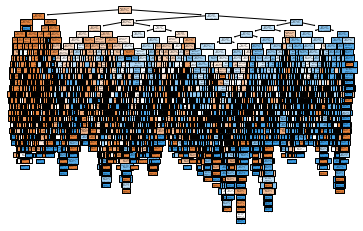

In [ ]:
from sklearn.tree import plot_tree #Para visualizar el modelo
plot_tree(decision_tree=model,feature_names=explicativas.columns, filled=True);

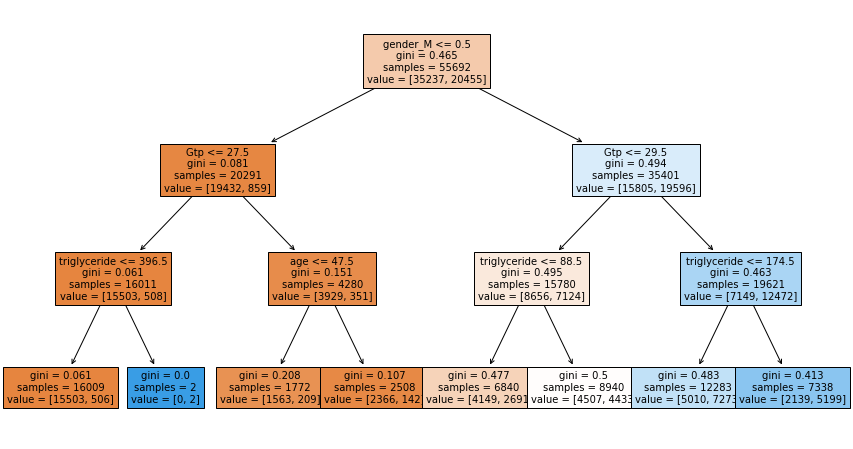

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plot_tree(decision_tree=model,feature_names=explicativas.columns, filled=True, fontsize=10);

### 5. Calcular Predicción

In [ ]:
a = explicativas.sample()
a

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,gender_M,tartar_Y
17181,21421,45,160,65,86.5,0.8,1.0,1.0,1.0,130.0,...,138.0,14.7,1.0,1.2,21.0,18.0,27.0,0,1,1


In [ ]:
model.predict_proba(a)

array([[1., 0.]])

In [ ]:
model.predict(explicativas).shape # Total de personas que fuman

(55692,)

### 6. Interpretat Modelo

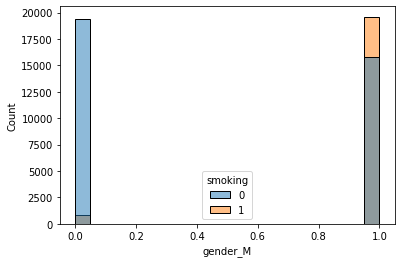

In [ ]:
import seaborn as sns
sns.histplot(x=df.gender_M, hue=df.smoking)

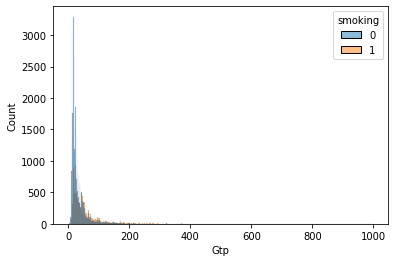

In [ ]:
sns.histplot(x=df.Gtp, hue=df.smoking)

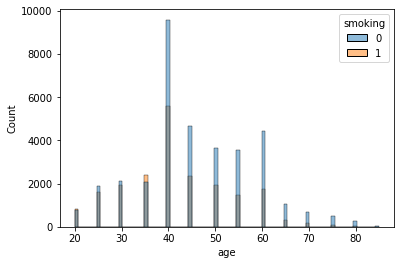

In [ ]:
sns.histplot(x=df.age, hue=df.smoking)

### 7. Efectividad del modelo


In [ ]:
y_pred = model.predict(explicativas) #Las prediciones
df['pred'] = y_pred #Insertamos las prediciones en la tabla
df.sample(10)[['smoking', 'pred']]

,smoking,pred
45730,1,1
33077,0,0
28756,0,0
33612,1,1
20870,1,1
50725,0,0
30560,0,0
5206,1,1
13180,0,0
33805,1,1


In [ ]:
(df['smoking'] == df['pred']).sum() #El total de aciertos

55692

In [ ]:
(df['smoking'] == df['pred']).mean() #El procentaje de aciertos

1.0